In [2]:
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import time 

In [14]:
begin=time.time()
data=pd.read_csv('data2.csv')
data=np.array(data)
a=int(data[0][0])
o=int(data[0][1])
X=data[1:,0:a]
y=data[1:,a:]
print(a,o)

44 5


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=32, random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.91

In [24]:
rnd_clf.estimators_

[DecisionTreeClassifier(max_features='auto', max_leaf_nodes=32,
                        random_state=1608637542),
 DecisionTreeClassifier(max_features='auto', max_leaf_nodes=32,
                        random_state=1273642419),
 DecisionTreeClassifier(max_features='auto', max_leaf_nodes=32,
                        random_state=1935803228),
 DecisionTreeClassifier(max_features='auto', max_leaf_nodes=32,
                        random_state=787846414),
 DecisionTreeClassifier(max_features='auto', max_leaf_nodes=32,
                        random_state=996406378),
 DecisionTreeClassifier(max_features='auto', max_leaf_nodes=32,
                        random_state=1201263687),
 DecisionTreeClassifier(max_features='auto', max_leaf_nodes=32,
                        random_state=423734972),
 DecisionTreeClassifier(max_features='auto', max_leaf_nodes=32,
                        random_state=415968276),
 DecisionTreeClassifier(max_features='auto', max_leaf_nodes=32,
                        rand

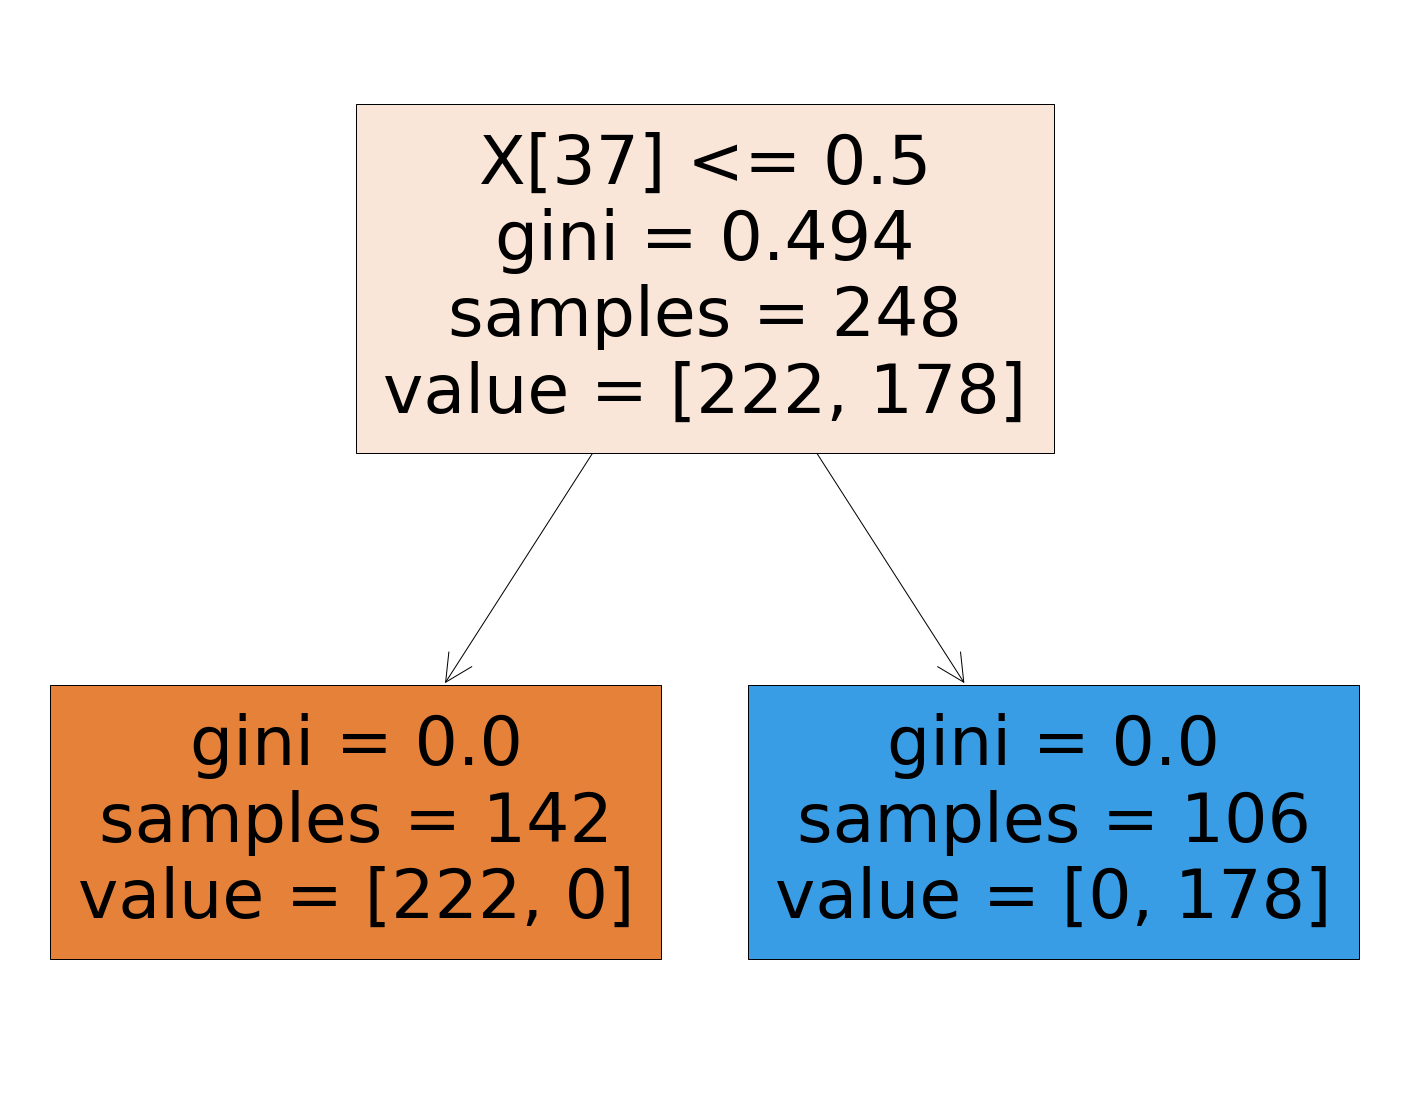

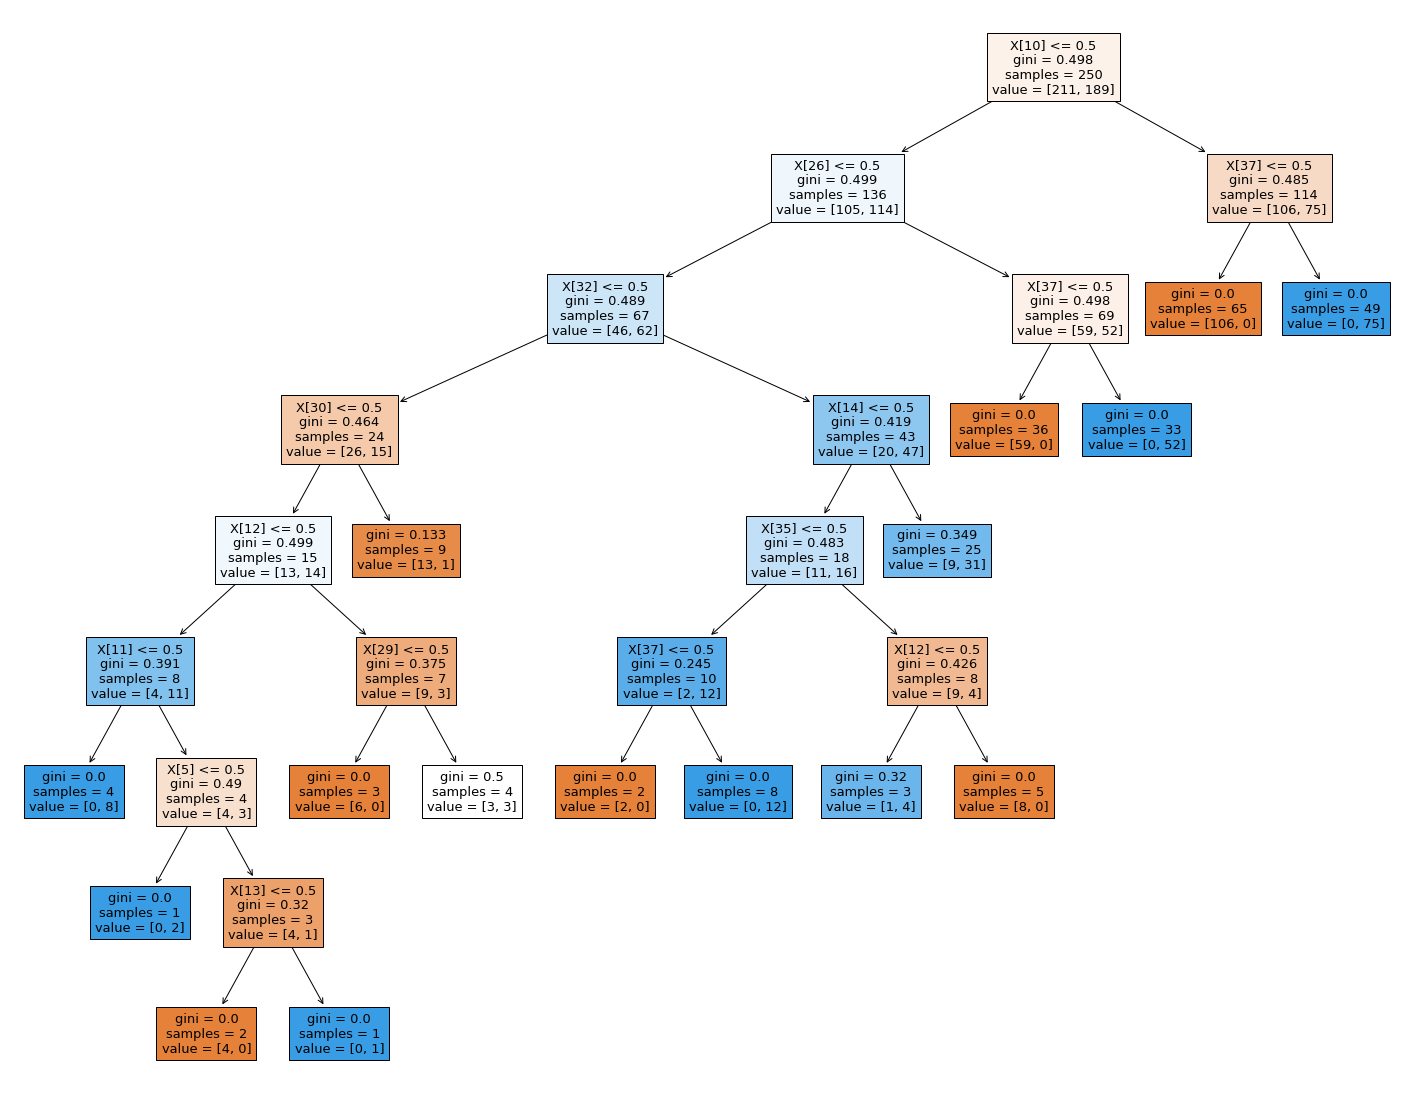

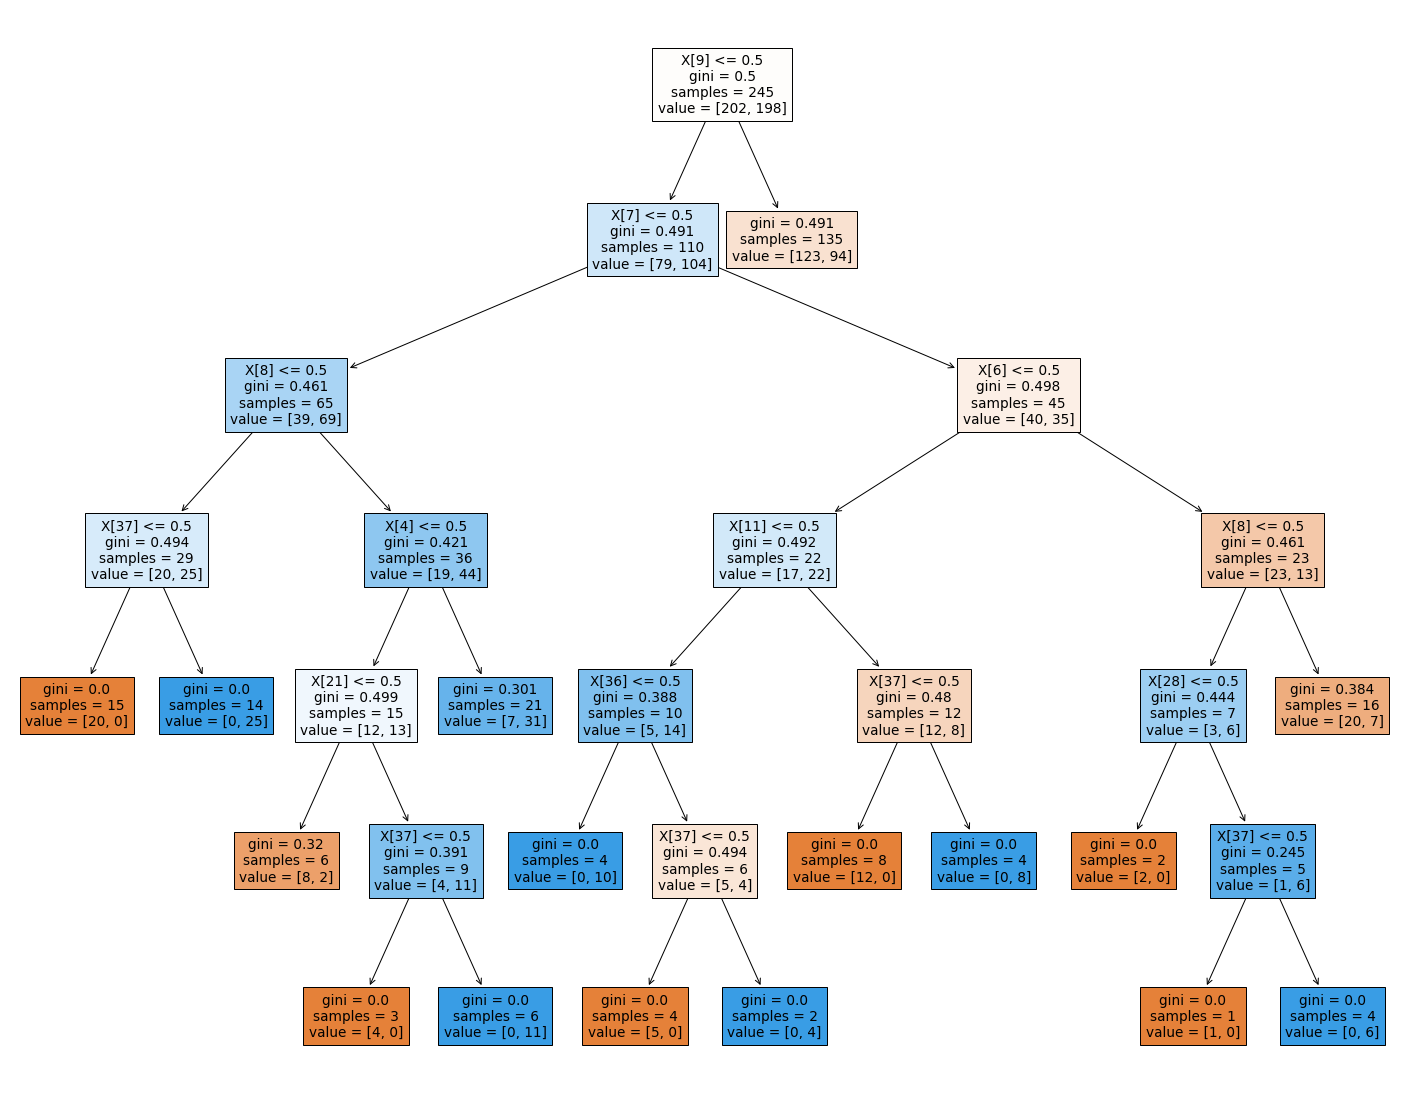

In [33]:
for i in range(3):
    fig = plt.figure(figsize=(25,20))
    _=tree.plot_tree(rnd_clf.estimators_[i], 
                   filled=True)
   

In [34]:
def sop(node,cla):
    
    if(children_left[node]==-1):
        return ""
    else:
        str1=sop(children_left[node],cla)
        str2=sop(children_right[node],cla)
        if(str1=="" and str2==""):
            if(find_class(children_left[node])==cla):
                return "("+"!X"+str(feature[node])+")"
            elif(find_class(children_right[node])==cla):
                return "(X"+str(feature[node])+")"
            else:
                return ""
                
            
            
        elif(str1!="" and str2==""):
            if(find_class(children_right[node])==cla):
                return "(X"+str(feature[node])+"+!X"+str(feature[node])+"*"+str1+")"
            else:
                return "(!X"+str(feature[node])+"*"+str1+")"
        elif(str1=="" and str2!=""):
            if(find_class(children_left[node])==cla):
                return "(X"+str(feature[node])+"*"+str2+"+!X"+str(feature[node])+")"
            else:
                return "(X"+str(feature[node])+"*"+str2+")"
        else:
            return "(X"+str(feature[node])+"*"+str2+"+!X"+str(feature[node])+"*"+str1+")"
def find_class(node_id):
    nodevalue = value[node_id]
    if (nodevalue[0][0] != 0):
        return "0"
    else:
        return "1"

In [35]:
def outputs(cla):
    str1=sop(children_left[0],cla)
    str2=sop(children_right[0],cla)
    output=""
    if(str1=="" and str2==""):
        if(find_class(children_left[0])==cla):
            output= "(!X"+str(feature[0])+")"
        elif(find_class(children_right[0])==cla):
            output= "(X"+str(feature[0])+")"
        else:
            output=""   
    elif(str1=="" and str2!=""):
        output = "(X"+str(feature[0])+"*"+str2+")"
        if(find_class(children_left[0])==cla):
            output= "(X"+str(feature[0])+"*"+str2+"+!X"+str(feature[0])+")"
        
    elif(str1!="" and str2==""):
        output = "(!X"+str(feature[0])+"*"+str1+")"
        if(find_class(children_right[0])==cla):
            output=  "(X"+str(feature[0])+"+!X"+str(feature[0])+"*"+str1+")"
        
    else:
        output = "(X"+str(feature[0])+"*"+str2+"+!X"+str(feature[0])+"*"+str1+")"
    return output


In [36]:
def solve(s):
    if(s.count('(')==0):
        return s
    else:
        a=0
        for i in range(len(s)):
            if(s[i]=='('):
                a=i
            if(s[i]==')'):
                b=""
                b+=s[a+1:i]
                if(len(b)==2 or len(b)==3):
                    s=s[0:a]+s[a+1:i]+s[i+1:]
                    break
                else:
                    if(s.count('+')==0):
                        s=s[0:a]+s[a+1:i]+s[i+1:]
                        break
                    else:
                        string=""
                        arr=[]
                        for k in range(a+1,i+1):
                            if(s[k]=='+' or s[k]==')'):
                                arr.append(string)
                                string=""
                            else:
                                string+=s[k]
                        if(s[a-1]=='+'):
                            string4=""
                            for t in range(len(arr)):
                                string4+='+'+arr[t]
                            s=s[0:a-1]+string4+s[i+1:]
                            break
                        if(s[a-1]=='!'):
                            string4=""
                            for t in range(len(arr)):
                                string4+='+!'+arr[t]
                            s=s[0:a-2]+string4+s[i+1:]
                            break
                        string2=""
                        j=a-1
                        while(s[j]!='X'):
                            string2+=s[j]
                            j-=1
                        string2+='X'
                        if(s[j-1]=="!"):
                            string2+="!"
                        string2=string2[::-1]
                        for xy in range(len(arr)):
                            arr[xy]=string2+arr[xy]
                        string3=""
                        for xyz in range(len(arr)):
                            if(xyz!=len(arr)-1):
                                string3+=arr[xyz]+"+"
                            else:
                                string3+=arr[xyz]
                        if(s[j-1]=='!'):
                            s=s[0:j-1]+string3+s[i+1:]
                            break
                        else:
                            s=s[0:j]+string3+s[i+1:]
                            break
        return(solve(s))


In [37]:
def gates(s,a):
    c=0
    d=[]
    for i in range(0,a):
        c+=1
        a="G"+str(i)
        b='Input'+'('+str((i))+')'
        d.append(a+'='+ b)
    arr=[]
    arr2=[]
    w=0
    while(w<len(s)):
        if(w==len(s)-1 or s[w]=='+'):
            if(len(arr)==1):
                if(arr[0][0]!='!'):
                    c+=1
                    a="G"+str(c)
                    string1=arr[0][1:]
                    b="AND"+'('+'G'+string1+','+'1'+')'
                    d.append(a+'='+b)
                    arr2.append(a)
                elif(arr[0][0]=='!'):
                    c+=1
                    a="G"+str(c)
                    k=0
                    string1=arr[0][2:]
                    b="NOT"+'('+'G'+string1+')'
                    d.append(a+'='+b)
                    arr2.append(a)
            else:
                string5=""
                if(arr[0][0]!='!' and arr[1][0]!='!'):
                    c+=1
                    a="G"+str(c)
                    string3="AND"+'('+'G'+arr[0][1:]+','+'G'+arr[1][1:]+')'
                    string5=a
                    d.append(a+'='+string3)
                elif(arr[0][0]=='!' and arr[1][0]!='!'):
                    c+=1
                    a="G"+str(c)
                    string_a=a
                    string3="NOT"+'('+'G'+arr[0][2:]+')'
                    d.append(a+'='+string3)
                    c+=1
                    a="G"+str(c)
                    string4="AND"+'('+string_a+','+'G'+arr[1][1:]+')'
                    string5=a
                    d.append(a+'='+string4)
                elif(arr[0][0]!='!' and arr[1][0]=='!'):
                    c+=1
                    a="G"+str(c)
                    string_a=a
                    string3="NOT"+'('+'G'+arr[1][2:]+')'
                    d.append(a+'='+string3)
                    c+=1
                    a="G"+str(c)
                    string4="AND"+'('+string_a+','+'G'+arr[0][1:]+')'
                    string5=a
                    d.append(a+'='+string4)
                else:
                    c+=1
                    a="G"+str(c)
                   
                    string4="NAND"+'('+'G'+arr[0][2:]+','+'G'+arr[1][2:]+')'
                    string5=a
                    d.append(a+'='+string4)
                if(len(arr)==2):
                    arr2.append(string5)
                for t2 in range(2,len(arr)):
                    if(t2==len(arr)-1):
                        if(arr[t2][0]=='!'):
                            c+=1
                            a="G"+str(c)
                            b="AND"+'('+string5+','+'NOT'+'('+'G'+arr[t2][2:]+')'+')'
                            d.append(a+'='+b)
                            string5=a
                            arr2.append(string5)
                        else:
                            c+=1
                            a="G"+str(c)
                            b="AND"+'('+string5+','+'G'+arr[t2][1:]+')'
                            d.append(a+'='+b)
                            string5=a
                            arr2.append(string5)
                    else:
                        if(arr[t2][0]=='!'):
                            c+=1
                            a="G"+str(c)
                            b="AND"+'('+string5+','+'NOT'+'('+'G'+arr[t2][2:]+')'+')'
                            d.append(a+'='+b)
                            string5=a
                        else:
                            c+=1
                            a="G"+str(c)
                            b="AND"+'('+string5+','+'G'+arr[t2][1:]+')'
                            d.append(a+'='+b)
                            string5=a
            arr=[]
            w+=1 
            #d.append(arr2)  
        else:
            string=''
            j=w
            while(j<len(s) and s[j]!='*' ):
                if(s[j]=='+'):
                    j=j-1
                    break
                elif(j==len(s)-1):
                    string+=s[j]
                    break
                else:
                    string+=s[j]
                    j+=1
            arr.append(string)
            if(j==len(s)-1):
                w=j
            else:
               w=j+1
    if(len(arr2)>2):
        c+=1
        a="G"+str(c)
        b="OR"+'('+arr2[0]+','+arr2[1]+')'
        string8=a
        d.append(a+'='+b)
        for i in range(2,len(arr2)):
            c+=1
            a="G"+str(c)
            b="OR"+'('+arr2[i]+','+string8+')'
            string8=a
            d.append(a+'='+b)
        q=string8   
        d.append('OUTPUT'+'='+a)  
    elif(len(arr2)==2):
        c+=1
        a="G"+str(c)
        b="OR"+'('+arr2[0]+','+arr2[1]+')'
       
        d.append(a+'='+b)
        string8=a
        
        d.append('OUTPUT'+'='+a)
    else:
        d.append('OUTPUT'+'='+arr2[0])
    return d 

In [38]:
out=[]
de=[]
for i in range(o):
    Y=y[0:,i:i+1]
    Y=np.ravel(Y)
    #print(Y)
    from sklearn.ensemble import RandomForestClassifier
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    rnd_clf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=16, random_state=42)
    rnd_clf.fit(X_train, y_train)
    clf = rnd_clf
    n_estimators=50
    estimatorAccuracy=[]
    for curEstimator in range(n_estimators):
        estimatorAccuracy.append([curEstimator,accuracy_score(y_test, clf.estimators_[curEstimator].predict(X_test))])

    estimatorAccuracy=pd.DataFrame(estimatorAccuracy,columns=['estimatorNumber','Accuracy'])
    estimatorAccuracy.sort_values(inplace=True,by='Accuracy',ascending=False)

    tree_clf= clf.estimators_[estimatorAccuracy.head(1)['estimatorNumber'].values[0]]
    n_nodes = tree_clf.tree_.node_count
    feature = tree_clf.tree_.feature
    children_left = tree_clf.tree_.children_left
    children_right = tree_clf.tree_.children_right
    impurity=tree_clf.tree_.impurity
    value = tree_clf.tree_.value
    s1=outputs("1")
    if(s1!=""):
        s=s1[1:-1]
        s3=solve(s)
        de.append(s3)
        out+=gates(s3,a)
    else:
        out+=[0]

In [39]:
final=[]
num=1
print(de)
for i in out:
    if i not in final:
        if i!=0:
            final.append(i)
        else:
            print(i)
for i in range(len(final)):
    if(final[i][0]=="O" and i!=len(final)-1):
        print(final[i])
        print()
    else:
        print(final[i])
end=time.time()
print(end-begin) 

['X22*X38+!X22*X38*X2*X25*X10*!X13*X24*X5+!X22*X38*!X2*X17*!X24*!X18*X23+!X22*X38*!X2*!X17*X23*!X33', 'X36', 'X37']
0
0
G0=Input(0)
G1=Input(1)
G2=Input(2)
G3=Input(3)
G4=Input(4)
G5=Input(5)
G6=Input(6)
G7=Input(7)
G8=Input(8)
G9=Input(9)
G10=Input(10)
G11=Input(11)
G12=Input(12)
G13=Input(13)
G14=Input(14)
G15=Input(15)
G16=Input(16)
G17=Input(17)
G18=Input(18)
G19=Input(19)
G20=Input(20)
G21=Input(21)
G22=Input(22)
G23=Input(23)
G24=Input(24)
G25=Input(25)
G26=Input(26)
G27=Input(27)
G28=Input(28)
G29=Input(29)
G30=Input(30)
G31=Input(31)
G32=Input(32)
G33=Input(33)
G34=Input(34)
G35=Input(35)
G36=Input(36)
G37=Input(37)
G38=Input(38)
G39=Input(39)
G40=Input(40)
G41=Input(41)
G42=Input(42)
G43=Input(43)
G45=AND(G22,G38)
G46=NOT(G22)
G47=AND(G46,G38)
G48=AND(G47,G2)
G49=AND(G48,G25)
G50=AND(G49,G10)
G51=AND(G50,NOT(G13))
G52=AND(G51,G24)
G53=AND(G52,G5)
G54=NOT(G22)
G55=AND(G54,G38)
G56=AND(G55,NOT(G2))
G57=AND(G56,G17)
G58=AND(G57,NOT(G24))
G59=AND(G58,NOT(G18))
G60=AND(G59,G23)
G61